In [1]:
import torch
import torchaudio
from torchaudio.transforms import MelSpectrogram
import matplotlib.pyplot as plt
import numpy as np

# Ensure you have the required libraries installed
# pip install torch torchaudio matplotlib


In [14]:
def extract_mel_spectrogram(audio_path, sample_rate=16000, n_mels=40):
    waveform, sr = torchaudio.load(audio_path)

    # Resample if necessary
    if sr != sample_rate:
        resampler = torchaudio.transforms.Resample(orig_freq=sr, new_freq=sample_rate)
        waveform = resampler(waveform)

    # Convert to mono by averaging channels
    if waveform.shape[0] > 1:
        waveform = waveform.mean(dim=0, keepdim=True)

    # Extract Mel spectrogram
    mel_transform = MelSpectrogram(sample_rate=sample_rate, n_mels=n_mels)
    mel_spectrogram = mel_transform(waveform)

    return mel_spectrogram.squeeze(0)


In [3]:
def compare_spectrograms(mel_spec1, mel_spec2):
    # Ensure both spectrograms are of the same length
    min_length = min(mel_spec1.shape[1], mel_spec2.shape[1])
    mel_spec1 = mel_spec1[:, :min_length]
    mel_spec2 = mel_spec2[:, :min_length]

    # Compute the difference
    difference = torch.abs(mel_spec1 - mel_spec2)

    return difference


In [23]:
def plot_spectrograms(mel_spec1, mel_spec2, difference):
    fig, axs = plt.subplots(3, 1, figsize=(100, 10))

    axs[0].imshow(mel_spec1.numpy(), aspect='auto', origin='lower')
    axs[0].set_title('Reference Voice Mel Spectrogram')

    axs[1].imshow(mel_spec2.numpy(), aspect='auto', origin='lower')
    axs[1].set_title('Your Voice Mel Spectrogram')

    axs[2].imshow(difference.numpy(), aspect='auto', origin='lower')
    axs[2].set_title('Difference')

    plt.show()


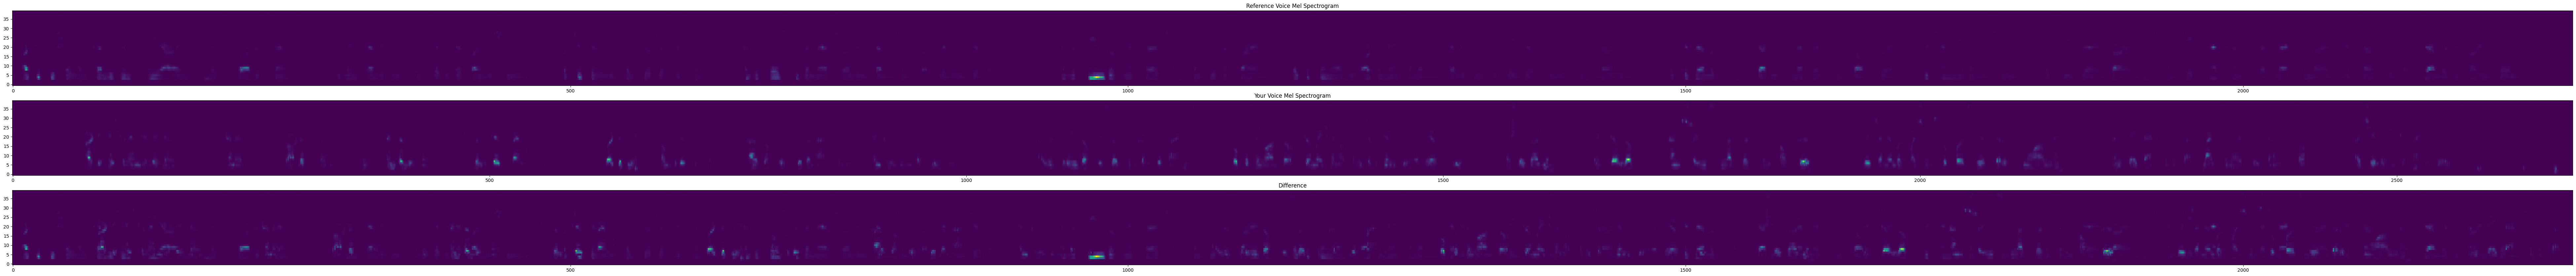

In [24]:
reference_audio_path = '/content/test1.wav'
your_audio_path = '/content/Recording (2).m4a'

# Extract Mel spectrograms
mel_spec1 = extract_mel_spectrogram(reference_audio_path)
mel_spec2 = extract_mel_spectrogram(your_audio_path)

# Compare spectrograms
difference = compare_spectrograms(mel_spec1, mel_spec2)

# Plot the spectrograms
plot_spectrograms(mel_spec1, mel_spec2,difference)
